In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


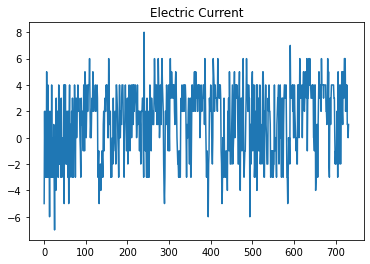

In [26]:
import tensorflow as tf
import numpy as np
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd

col_list = ['Electric Current']
dataframe = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/sensor_data4.csv', usecols=col_list)

df = np.array(dataframe).flatten()
df = pd.Series(df)
df.plot()
plt.title("Electric Current")
plt.show()
N=df.size

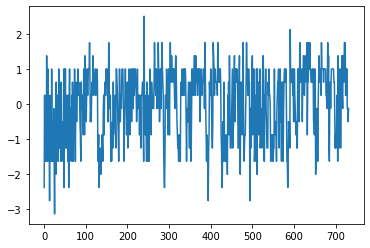

In [27]:
# 전처리 (필수)
ts = 20      # time steps (앞의 7개를 보고 다음 1개를 예측)

# Input Normalization(standardization)
df = df.map(lambda x : (x - df.mean()) / np.std(df))
df.plot()

In [28]:
# Creating train data set (7 inputs, 1 outputs) 
X_train = np.asarray([np.array([df.values[i+j] for j in range(ts)])
                      for i in range(len(df) - ts)]).reshape(-1,ts,1) # 7차원짜리 데이터 725개
y_train = df.values[ts:]

X_train.shape, y_train.shape

((712, 20, 1), (712,))

In [29]:
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(100, input_shape=(ts,1)))
#model.add(tf.keras.layers.LSTM(100, input_shape=(ts,1)))

# Add a Dense layer with 1 units.
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Start training
model.compile(optimizer='sgd',loss='mse')
model.fit(X_train,y_train, epochs=100)              

Epoch 1/100
23/23 [==============================] - 1s 5ms/step - loss: 0.9966
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7969
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7609
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.8041
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7725
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7808
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7825
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7815
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7615
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7397
Epoch 11/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7161
Epoch 12/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6679
Epoch 13/100
23/23 [=================

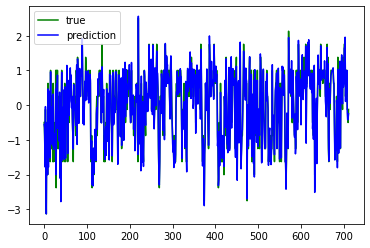

(712, 1)

In [31]:
plt.plot(y_train[:],'g-',label="true")
plt.plot(model.predict(X_train[:,:,:]),'b-',label="prediction")
plt.legend()
plt.show()
model.predict(X_train[:,:,:]).shape

In [ ]:
df_new=df[-ts:]
df_new = np.asarray([np.array([df.values[i+j] for j in range(ts)])
                      for i in range(len(df_new) - ts+1)]).reshape(-1,ts,1) # 7차원짜리 데이터 1개

for i in range(0, ts):
  pred = model.predict(df_new)
  for j in range(0, df_new.size-1):
    df_new[-1][j]=df_new[-1][j+1]
  df_new[-1][-1]=pred
  print(df_new)

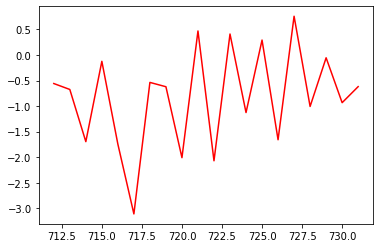

In [33]:
X=np.array(range(N-ts,N))
plt.plot(X,df_new[-1],'r-',label="forcasting")

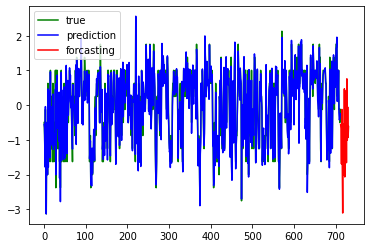

In [34]:
plt.plot(y_train[:],'g-',label="true")
plt.plot(model.predict(X_train[:,:,:]),'b-',label="prediction")
plt.plot(X,df_new[-1],'r-',label="forcasting")
plt.legend()
plt.show()